### **Visualización para ciencia de datos / Proyecto 1-Parte V (Core)**

## Proyecto 1-Parte V (Core)
### Análisis y Predicción de Ventas en una Tienda de Retail

### Parte V: Exploración y Visualización de Datos Avanzada

En esta quinta parte del proyecto, vamos a expandir nuestro análisis exploratorio de datos (EDA) y visualización utilizando técnicas avanzadas. Aplicaremos todo lo que hemos aprendido hasta ahora, incluyendo cuadrículas, leyendas, anotaciones, flechas, y subplots, para obtener una comprensión más profunda de nuestro conjunto de datos de ventas.

### Instrucciones

### Continuar desde la Parte IV
* Asegúrate de tener el DataFrame df ya cargado y preparado desde la Parte IV.
* Exploración de Datos Avanzada
* Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.
* Crea subplots para comparar diferentes variables clave.
* Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.
### Generar un Tag en GitHub y Realizar una Presentación
* Generar un Tag en GitHub: Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub, genera un Pull Request (PR) para revisión y finalmente crea un tag para esta versión del proyecto.
* Realizar una Presentación: Prepara una presentación en slides que resuma tu análisis y visualizaciones. La presentación debe incluir:
### Introducción y objetivos del proyecto.
* Descripción del conjunto de datos.
* Principales análisis y hallazgos.
* Visualizaciones clave con explicación.
* Conclusiones y recomendaciones.
* Utiliza herramientas como PowerPoint, Google Slides o cualquier otra aplicación de presentación.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
path = '../data/retail_sales_dataset.csv'
df = pd.read_csv(path, delimiter=',', header=0)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Analisis de Correlacion y Heatmap

Seleccionamos todas nuestras columnas numericas

In [48]:
numerics_columns = df.select_dtypes(include=np.number).columns
df[numerics_columns].describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Aplicamos la funcion correlacion para obtener resultados

In [49]:
df[numerics_columns].corr()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000


Creamos un heatmap con los resultados

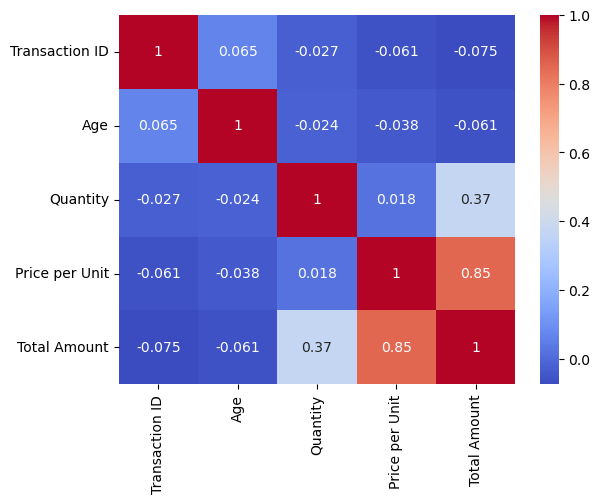

In [50]:
plt.figure()
sns.heatmap(df[numerics_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

### Subplots

C:\Users\guill\AppData\Local\Temp\ipykernel_14248\3970582128.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Total Amount', y='Age', data=df_box_numerics, palette='Pastel1', ax=axes[0, 0])
C:\Users\guill\AppData\Local\Temp\ipykernel_14248\3970582128.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df_temp.resample('M').sum()
C:\Users\guill\AppData\Local\Temp\ipykernel_14248\3970582128.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_arrow = df_resampled['Quantity'][5]  # Cantidad correspondiente al sexto mes
C:\Users\guill\AppData\Local\Temp\ipykernel_14248\3970582128

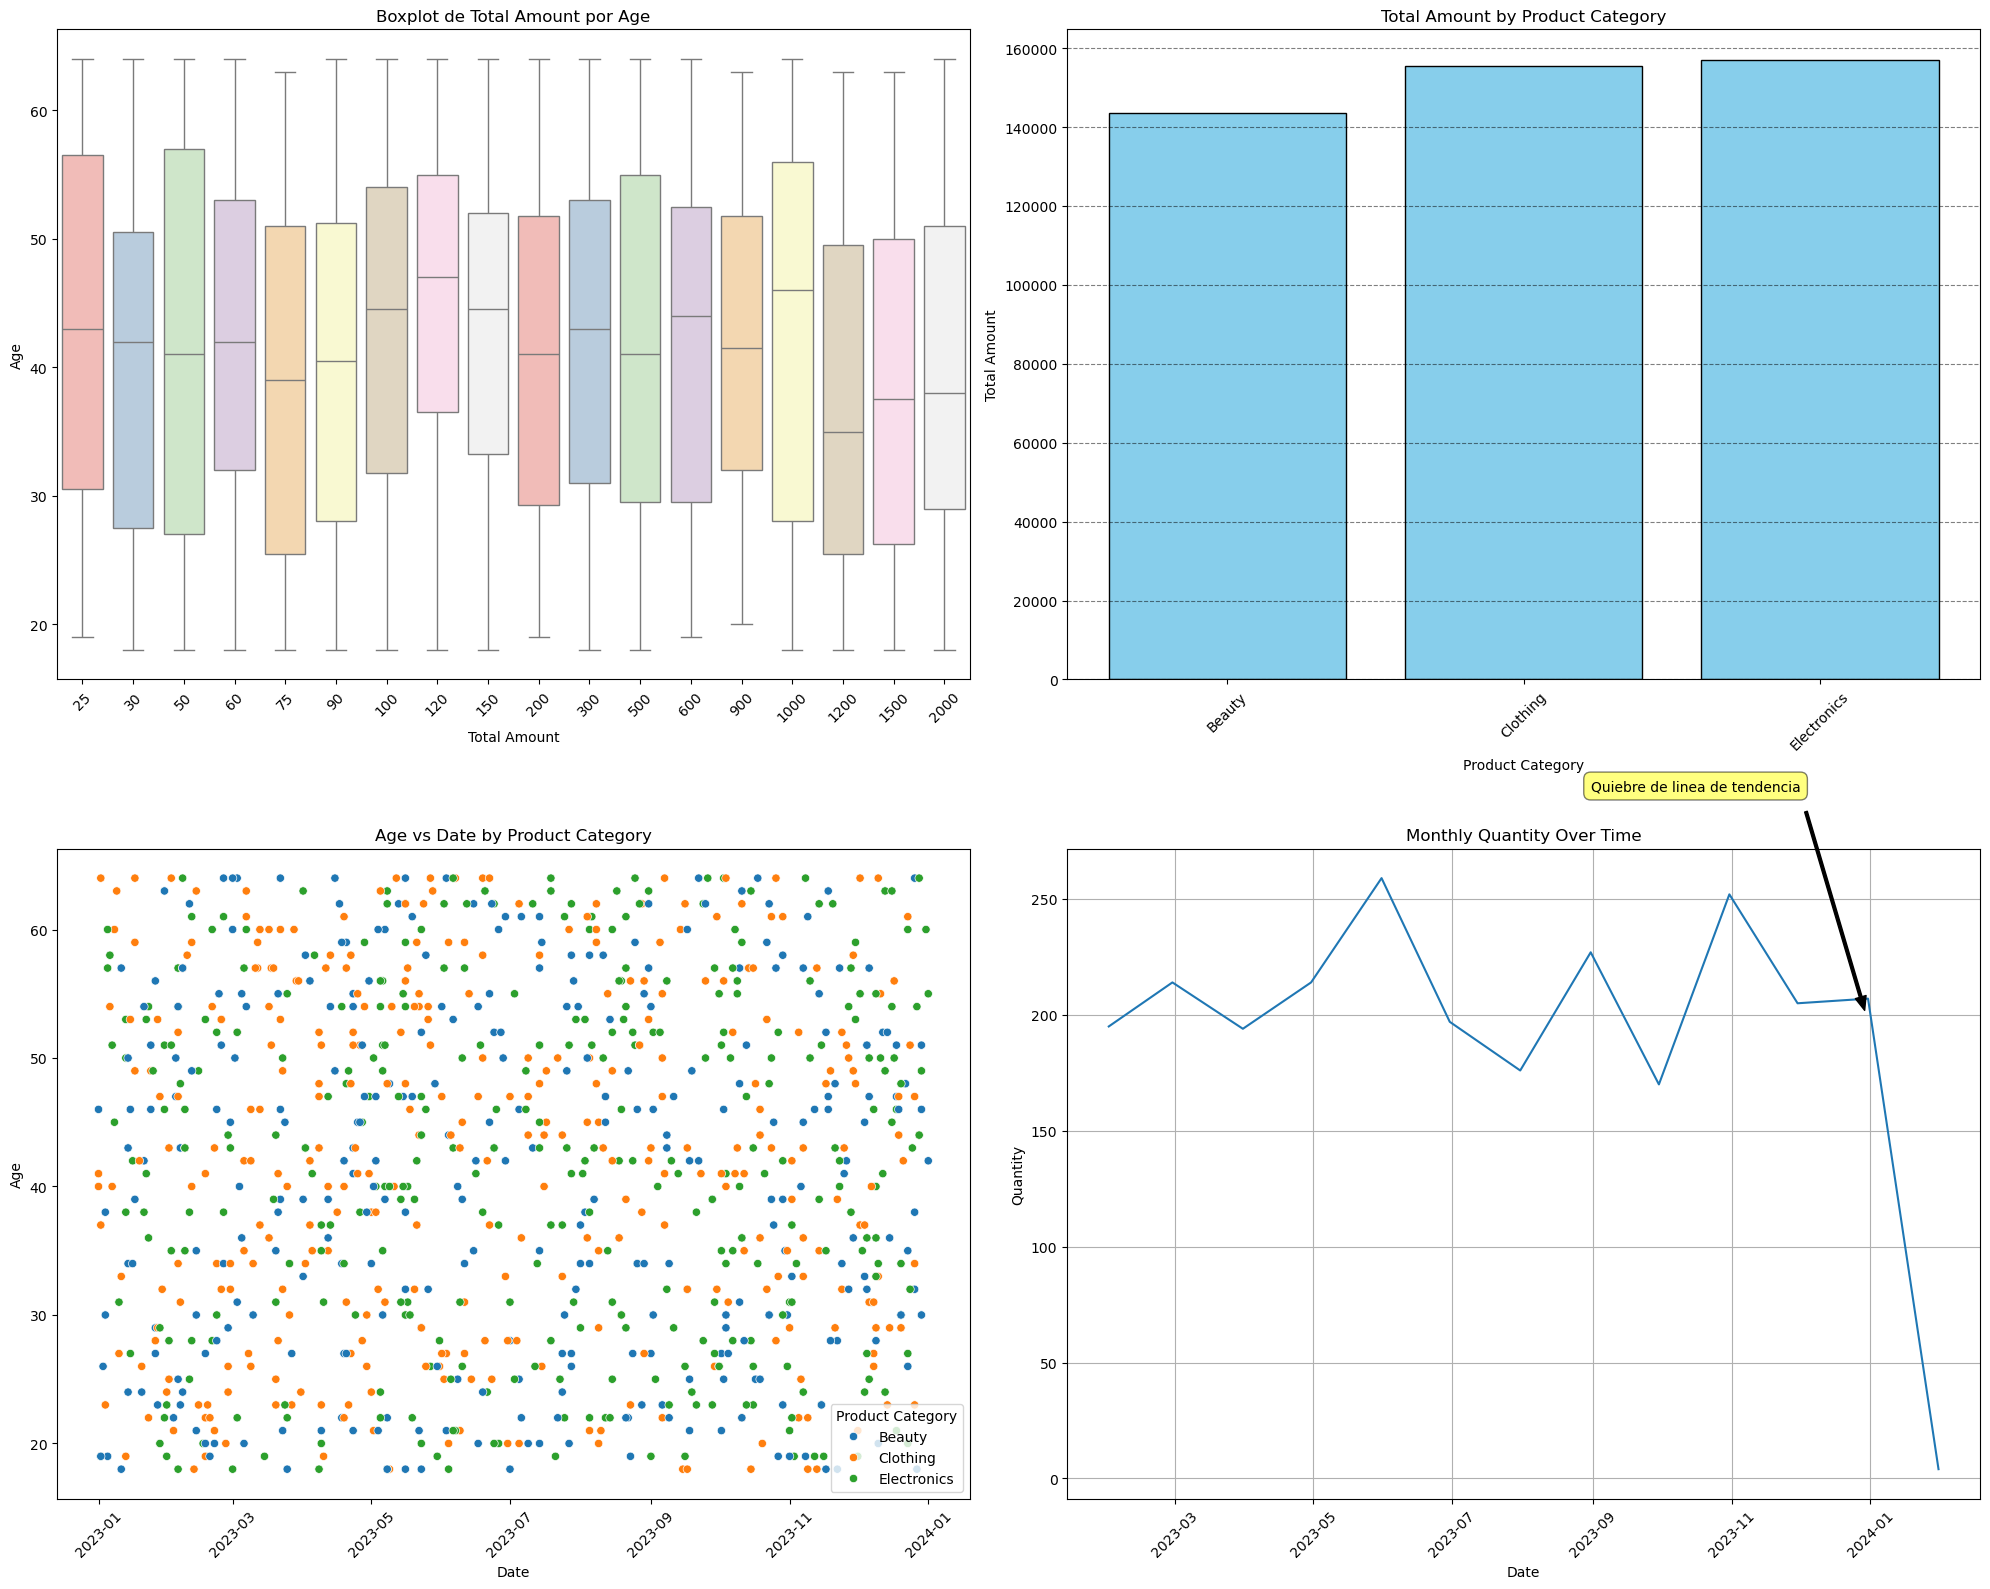

In [51]:
df['Date'] = pd.to_datetime(df['Date']) # Convertimos la columna Date a su dtype correspondiente

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))  # 2 filas, 2 columnas

# Gráfico 1: Boxplot de Total Amount por Age
df_box_numerics = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].dropna()
sns.boxplot(x='Total Amount', y='Age', data=df_box_numerics, palette='Pastel1', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot de Total Amount por Age', fontsize=12)
axes[0, 0].set_xlabel('Total Amount', fontsize=10)
axes[0, 0].set_ylabel('Age', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Bar plot de Total Amount por Product Category
grouped3 = df.groupby('Product Category')['Total Amount'].sum().reset_index()
axes[0, 1].bar(grouped3['Product Category'], grouped3['Total Amount'], color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Product Category')
axes[0, 1].set_ylabel('Total Amount')
axes[0, 1].set_title('Total Amount by Product Category')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, axis='y', linestyle='--', alpha=0.5, color = 'black')

# Gráfico 3: Scatter plot
sns.scatterplot(data=df, x='Date', y='Age', hue='Product Category', ax=axes[1, 0])
axes[1, 0].set_title('Age vs Date by Product Category')
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Line plot
if isinstance(df.index, pd.DatetimeIndex):
    df_temp = df.copy()
else:
    df_temp = df.copy()
    df_temp.set_index('Date', inplace=True)

df_resampled = df_temp.resample('M').sum()
sns.lineplot(data=df_resampled, x=df_resampled.index, y='Quantity', ax=axes[1, 1])
axes[1, 1].set_title('Monthly Quantity Over Time')
axes[1, 1].set_ylabel('Quantity')
axes[1, 1].tick_params(axis='x', rotation=45)

# Agregar flecha y anotación
# Puedes modificar estas coordenadas (x, y) según donde quieras que aparezca la flecha
x_arrow = df_resampled.index[11]  # Ejemplo: punto en el sexto mes
y_arrow = df_resampled['Quantity'][5]  # Cantidad correspondiente al sexto mes
x_text = df_resampled.index[7]  # Posición del texto
y_text = df_resampled['Quantity'][5] + 100  # Ajusta el +100 según necesites

axes[1, 1].annotate(
    'Quiebre de linea de tendencia',  # Texto que quieres mostrar
    xy=(x_arrow, y_arrow),  # Punto donde termina la flecha
    xytext=(x_text, y_text),  # Punto donde se ubica el texto
    arrowprops=dict(
        facecolor='black',
        shrink=0.05,
        width=2,
        headwidth=8,
        headlength=10
    ),
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5)
)
# Ajustar el espaciado entre los gráficos
plt.tight_layout()
plt.grid()
plt.show()



# Presentacion

## Introducción y objetivos del proyecto

El proyecto se enfoca en el análisis de un conjunto de datos de ventas minoristas con el objetivo de identificar patrones de compra y comportamientos de los clientes, con un enfoque particular en las categorías de productos y las cantidades de ventas a lo largo del tiempo. A través de la exploración y visualización de datos, se pretende obtener información clave que permita optimizar las estrategias de ventas y marketing, además de anticipar tendencias futuras.

## Descripción del conjunto de datos

El dataset incluye información relacionada con las ventas realizadas en varias categorías de productos: Belleza, Ropa, y Electrónica. Las variables principales analizadas son el monto total de ventas, la edad de los clientes, las fechas de las compras, y las cantidades de productos vendidos mensualmente.

## Principales análisis y hallazgos


<div>
<img src="../data/grafico_scatter.png" width="500"/>
</div>

### Boxplot del Total Amount por Age (Gráfico superior izquierdo):

Este gráfico muestra la distribución del monto total de ventas por rangos de edad de los clientes.
Se observa que la dispersión del monto gastado es bastante amplia en todas las edades, lo que sugiere que no hay un grupo etario dominante que gaste significativamente más o menos que otros. Las edades alrededor de los 50 años presentan algunos valores máximos de montos altos, mientras que los más jóvenes tienden a tener un rango de gastos más controlado.

<div>
<img src="../data/napkin-selection (2).png" width="500"/>
</div>

### Total Amount by Product Category (Gráfico superior derecho):

Este gráfico de barras indica los montos totales generados por cada categoría de productos.
Las categorías de Ropa, Belleza y Electrónica presentan montos de ventas totales bastante similares, lo que implica que estas tres categorías tienen un desempeño parejo en términos de ventas totales.
No se observan diferencias significativas entre las categorías en cuanto a los ingresos generados, aunque es posible que haya diferencias si se analizan con mayor detalle aspectos como la cantidad de artículos vendidos o la rentabilidad por producto.

### Age vs Date by Product Category (Gráfico inferior izquierdo):

Este gráfico de dispersión muestra la relación entre la edad de los clientes y las fechas de las compras, desglosado por categoría de producto.
Los puntos están distribuidos uniformemente a lo largo del tiempo, lo que sugiere que no hay un patrón temporal claro en cuanto a la relación entre la edad y el tipo de producto comprado. Sin embargo, se puede notar que las personas más jóvenes tienden a realizar compras de manera más constante en el tiempo.
La distribución de categorías de productos también parece balanceada a través del tiempo, aunque el comportamiento de los clientes más mayores podría investigarse más a fondo para entender su menor presencia en ciertas fechas.

### Monthly Quantity Over Time (Gráfico inferior derecho):

<div>
<img src="../data/napkin-selection (1).png" width="500"/>
</div>

Este gráfico de línea muestra la cantidad de ventas mensuales durante el período de análisis.
Se observa una tendencia de crecimiento en la cantidad de ventas mensuales hasta noviembre de 2023, seguido de una fuerte caída en diciembre de 2023, que está marcado como un "quiebre de tendencia".
Este descenso repentino en las ventas podría ser motivo de investigación para entender si se debe a una cuestión estacional, problemas logísticos, cambios en el comportamiento de los consumidores, o factores externos como la situación económica.


### Conclusiones y Recomendaciones


<div>
<img src="../data/napkin-selection.png" width="500"/>
</div>

Las ventas parecen estar bien distribuidas entre las categorías de Belleza, Ropa, y Electrónica, pero una segmentación más profunda podría revelar oportunidades para ajustar inventarios y estrategias de marketing.

La falta de un patrón claro en la relación entre edad y fecha de compra sugiere que las campañas publicitarias y promociones podrían personalizarse más según el grupo etario.

El quiebre de tendencia observado en diciembre de 2023 merece especial atención. Sería recomendable investigar si este fenómeno es temporal o si es indicativo de un cambio en el mercado, con el fin de ajustar las proyecciones de ventas y tomar medidas correctivas.